In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(50882, 14)

In [4]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [7]:
df.isna().sum(axis=0)

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [11]:
df['Holding_Policy_Type'].unique(),df['Holding_Policy_Duration'].unique(),df['Health Indicator'].unique()

(array([ 3., nan,  1.,  4.,  2.]),
 array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
        '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object),
 array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
       dtype=object))

In [12]:
(df['Holding_Policy_Type'].value_counts()/len(df['Holding_Policy_Type']))*100

3.0    26.097638
1.0    16.062655
2.0     9.836484
4.0     8.203294
Name: Holding_Policy_Type, dtype: float64

In [13]:
df['Health Indicator'] = df[['Health Indicator']].replace(to_replace=np.nan, value='X1')

In [14]:
df['Holding_Policy_Duration'] = df[['Holding_Policy_Duration']].replace(to_replace=np.nan, value='X1')

In [15]:
df['Holding_Policy_Duration'].value_counts()

X1      20251
1.0      4499
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [16]:
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,X1,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,X1,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [17]:
df['Holding_Policy_Duration'] = df[['Holding_Policy_Duration']].replace(to_replace=np.nan, value='1.0')

In [18]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [19]:
df['Holding_Policy_Type'] = df[['Holding_Policy_Type']].replace(to_replace=np.nan, value='3.0')

In [20]:
df.isna().sum(axis = 0)

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### Apply the imputing techniques to replace all the NaN values.

In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum(axis=0)

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### Numerical Data Analysis

In [23]:
df_num = df._get_numeric_data()

In [24]:
df_num.head()

,ID,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,3213,36,36,22,11628.0,0
1,2,1117,75,22,22,30510.0,0
2,3,3732,32,32,19,7450.0,1
3,4,4378,52,48,19,17780.0,0
4,5,2190,44,44,16,10404.0,0


### Removing ID column as we it will be of any use

In [25]:
df_num = df_num.drop(labels = ['ID', 'Region_Code'], axis = 1)

In [26]:
df_num

,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,36,36,22,11628.0,0
1,75,22,22,30510.0,0
2,32,32,19,7450.0,1
3,52,48,19,17780.0,0
4,44,44,16,10404.0,0
...,...,...,...,...,...
50877,22,22,18,7704.0,0
50878,27,27,4,5408.0,0
50879,63,63,12,11374.0,0
50880,71,49,16,28179.2,1


In [27]:
df_num

,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,36,36,22,11628.0,0
1,75,22,22,30510.0,0
2,32,32,19,7450.0,1
3,52,48,19,17780.0,0
4,44,44,16,10404.0,0
...,...,...,...,...,...
50877,22,22,18,7704.0,0
50878,27,27,4,5408.0,0
50879,63,63,12,11374.0,0
50880,71,49,16,28179.2,1


In [28]:
from sklearn.feature_selection import VarianceThreshold
vr = VarianceThreshold(threshold=5)
vr.fit(df_num)
vr.get_support()

array([ True,  True,  True,  True, False])

Text(0, 0.5, 'Recommendation Policy Premium')

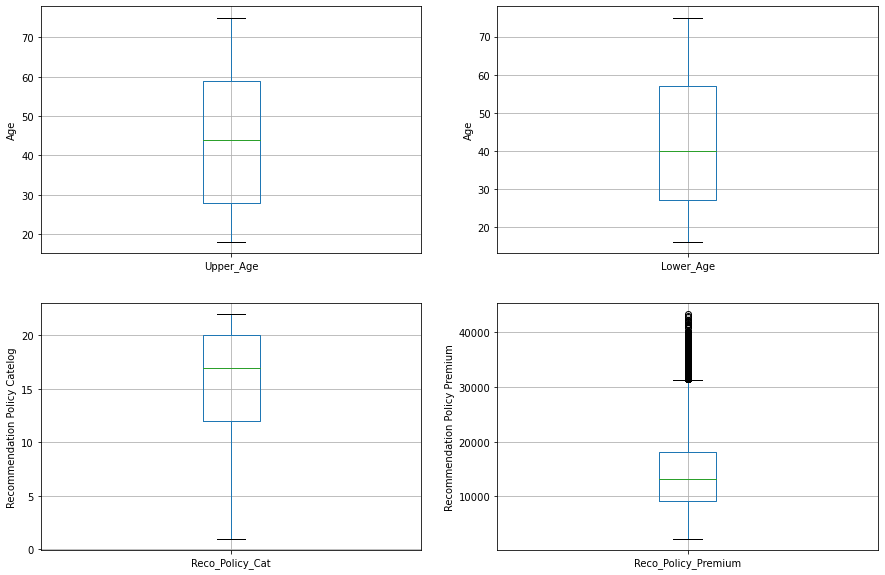

In [29]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df_num.boxplot(column='Upper_Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 2, 2)
fig = df_num.boxplot(column='Lower_Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 2, 3)
fig = df_num.boxplot(column='Reco_Policy_Cat')
fig.set_title('')
fig.set_ylabel('Recommendation Policy Catelog')


plt.subplot(2, 2, 4)
fig = df_num.boxplot(column='Reco_Policy_Premium')
fig.set_title('')
fig.set_ylabel('Recommendation Policy Premium')


In [30]:
ser = df.Reco_Policy_Premium.quantile([0.25,0.5,0.75]) 

In [31]:
q3 = df.Reco_Policy_Premium.quantile([0.75])

In [32]:
max_val = q3[0.75] + 2 * (df.Reco_Policy_Premium.quantile([0.75])[0.75] - df.Reco_Policy_Premium.quantile([0.25])[0.25])

In [33]:
df.loc[(df.Reco_Policy_Premium > max_val ) == True]['Reco_Policy_Premium'] = max_val

<ipython-input-33-0512e05f3deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df.Reco_Policy_Premium > max_val ) == True]['Reco_Policy_Premium'] = max_val


In [34]:
(df.Reco_Policy_Premium > max_val) == True

0        False
1        False
2        False
3        False
4        False
         ...  
50877    False
50878    False
50879    False
50880    False
50881    False
Name: Reco_Policy_Premium, Length: 50882, dtype: bool

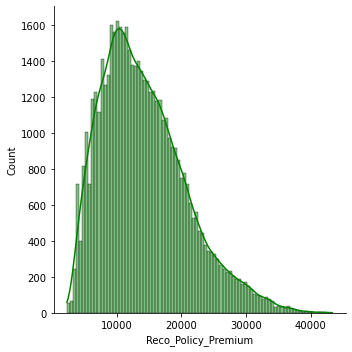

In [35]:
import seaborn as sns
sns.displot(df_num['Reco_Policy_Premium'], kde=True, color = 'green')

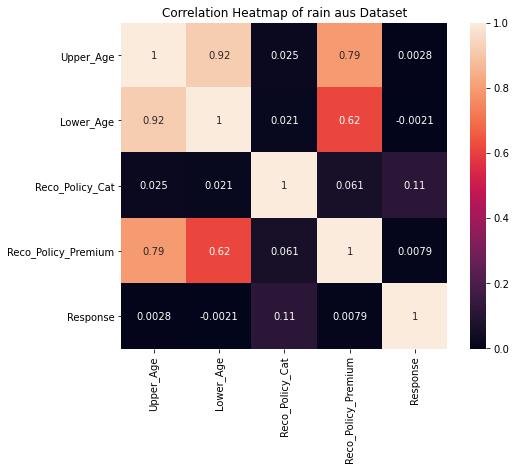

In [36]:
corr_matrix = df_num.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of rain aus Dataset')
sns.heatmap(corr_matrix, annot=True, square=True, linecolor='black')
plt.show()

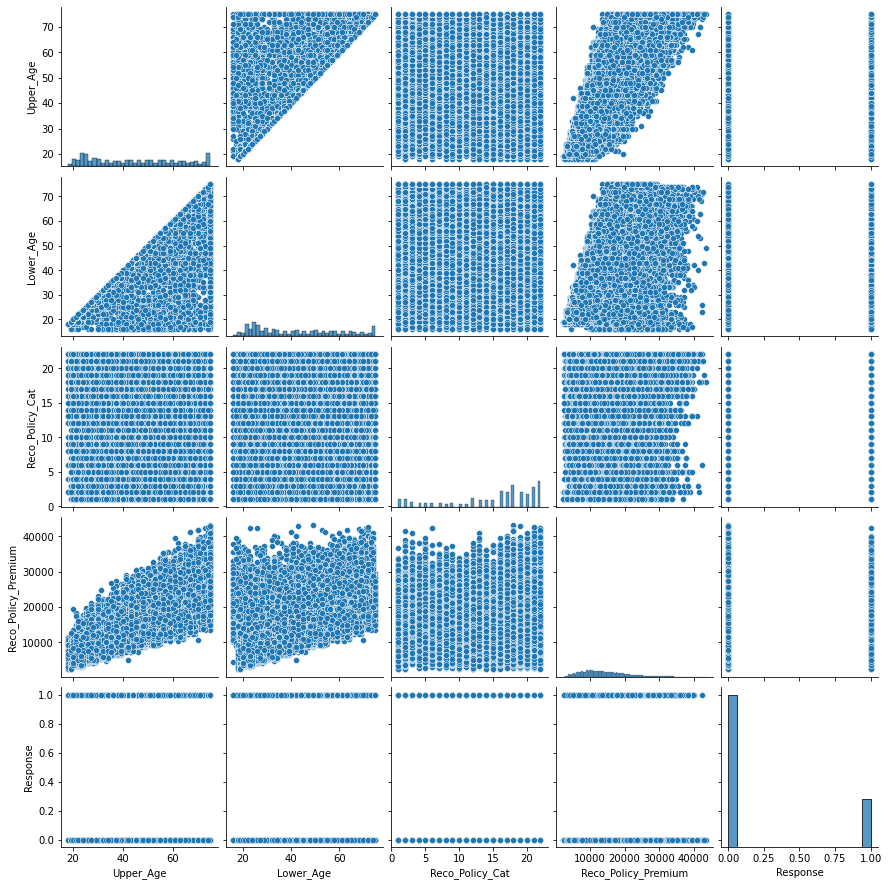

In [37]:
sns.pairplot(df_num.loc[:,df_num.columns.values], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [38]:
df_num['Response']

0        0
1        0
2        1
3        0
4        0
        ..
50877    0
50878    0
50879    0
50880    1
50881    0
Name: Response, Length: 50882, dtype: int64

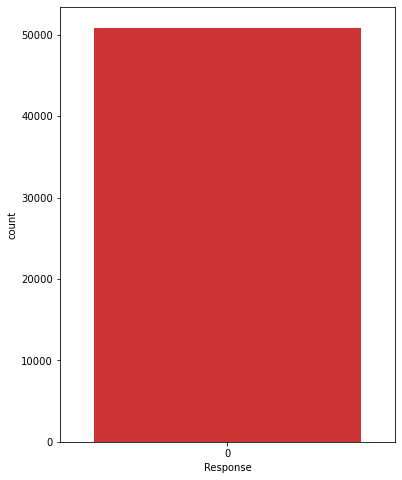

In [39]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x=df_num["Response"], data=df_num['Response'], palette="Set1")
plt.show()

In [40]:
df_string = df.drop(labels=df._get_numeric_data().columns, axis = 1)

In [41]:
df_string

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type
0,C3,Rented,Individual,No,X1,14+,3.0
1,C5,Owned,Joint,No,X2,X1,3.0
2,C5,Owned,Individual,No,X1,1.0,1.0
3,C24,Owned,Joint,No,X1,14+,3.0
4,C8,Rented,Individual,No,X2,3.0,1.0
...,...,...,...,...,...,...,...
50877,C4,Rented,Individual,No,X3,X1,3.0
50878,C5,Rented,Individual,No,X3,7.0,3.0
50879,C1,Rented,Individual,No,X2,14+,1.0
50880,C1,Owned,Joint,No,X2,2.0,2.0


In [42]:
for i in range(len(df_string.columns)):
    print(df_string.iloc[:, i].unique())

['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
['Rented' 'Owned']
['Individual' 'Joint']
['No' 'Yes']
['X1' 'X2' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
['14+' 'X1' '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
[3.0 '3.0' 1.0 4.0 2.0]


In [43]:
df_string.isna().sum(axis=0)

City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
dtype: int64

In [44]:
df_string_dummies = pd.get_dummies(df_string, drop_first=True)

In [45]:
df_string_dummies

,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,...,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Duration_X1,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_3.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
50878,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
50879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
df_string_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   City_Code_C10                 50882 non-null  uint8
 1   City_Code_C11                 50882 non-null  uint8
 2   City_Code_C12                 50882 non-null  uint8
 3   City_Code_C13                 50882 non-null  uint8
 4   City_Code_C14                 50882 non-null  uint8
 5   City_Code_C15                 50882 non-null  uint8
 6   City_Code_C16                 50882 non-null  uint8
 7   City_Code_C17                 50882 non-null  uint8
 8   City_Code_C18                 50882 non-null  uint8
 9   City_Code_C19                 50882 non-null  uint8
 10  City_Code_C2                  50882 non-null  uint8
 11  City_Code_C20                 50882 non-null  uint8
 12  City_Code_C21                 50882 non-null  uint8
 13  City_Code_C22                 5

In [47]:
concatenated_df = pd.concat([df_num,df_string_dummies], axis=1)

In [48]:
concatenated_df

,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,...,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Duration_X1,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_3.0
0,36,36,22,11628.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,75,22,22,30510.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,32,32,19,7450.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,48,19,17780.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,44,16,10404.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,22,22,18,7704.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
50878,27,27,4,5408.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
50879,63,63,12,11374.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,71,49,16,28179.2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
x = concatenated_df.drop(['Response'], axis = 1)

In [50]:
x

,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,...,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Duration_X1,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_3.0
0,36,36,22,11628.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,75,22,22,30510.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,32,32,19,7450.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,48,19,17780.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,44,16,10404.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,22,22,18,7704.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
50878,27,27,4,5408.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
50879,63,63,12,11374.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,71,49,16,28179.2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
y = concatenated_df['Response'] 

In [52]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import statistics

In [54]:
X_train.shape, x_test.shape

((40705, 69), (10177, 69))

In [55]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C = 0.01, solver='saga', random_state=42)
lg.fit(X_train, Y_train.values.ravel())
y_pred_lg = lg.predict(x_test)
y_pred_l_train = lg.predict(X_train)


C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [56]:
conf_metr_lg = metrics.confusion_matrix(y_test, y_pred_lg)
conf_metr_lg

array([[7765,    0],
       [2412,    0]], dtype=int64)

In [57]:
conf_metr_lg = metrics.confusion_matrix(Y_train, y_pred_l_train)
conf_metr_lg

array([[30908,     0],
       [ 9797,     0]], dtype=int64)

In [58]:
res = cross_val_score(lg,  X_train, Y_train, cv=10)
mean = sum(res)/len(res)
print('Mean: {}, SD: {}'.format(mean, statistics.stdev(res)))

C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Mean: 0.7593170426405503, SD: 0.00010106259554433888


C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [59]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

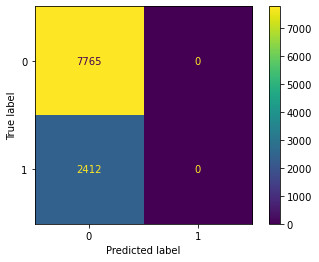

In [60]:
plot_confusion_matrix(lg, x_test, y_test) 
plt.show() 

In [61]:
pd.set_option('display.max_rows', 500)

In [62]:
classification_report(y_test,y_pred_lg)

C:\Users\sanke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.87      7765\n           1       0.00      0.00      0.00      2412\n\n    accuracy                           0.76     10177\n   macro avg       0.38      0.50      0.43     10177\nweighted avg       0.58      0.76      0.66     10177\n'

In [63]:
THRESHOLD = 0.44
lg.fit(x_test, y_test )
preds = np.where(lg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
conf_metr_lg_PCA_thr = metrics.confusion_matrix(y_test, preds)
conf_metr_lg_PCA_thr

C:\Users\sanke\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


array([[7751,   14],
       [2411,    1]], dtype=int64)

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [65]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [66]:
dt = DecisionTreeClassifier(criterion='entropy', max_features='sqrt',min_samples_leaf = 1,min_samples_split = 2, max_depth=8, random_state=42)
res = cross_val_score(dt, X_train, Y_train.values.ravel(), cv=10)
mean = sum(res)/len(res)
print('Mean: {}, SD: {}'.format(mean, statistics.stdev(res)))

Mean: 0.758334362365313, SD: 0.0007572916386730671


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=8)
rf.fit(X_train, Y_train.values.ravel())
train_pred = rf.predict(X_train)
test_pred =  rf.predict(x_test)


In [69]:
res = cross_val_score(rf, X_train, Y_train, cv=10)
mean = sum(res)/len(res)
print('Mean: {}, SD: {}'.format(mean, statistics.stdev(res)))

Mean: 0.7593170426405503, SD: 0.00010106259554433888


In [70]:
import numpy as np
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree


In [71]:
random_grid = {'criterion':criterion,
    'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

In [72]:
rf_raomized_search_cv = RandomForestClassifier()
dt_random = RandomizedSearchCV(estimator = rf_raomized_search_cv, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [73]:
res = cross_val_score(dt_random, X_train, Y_train, cv=10)
mean = sum(res)/len(res)
print('Mean: {}, SD: {}'.format(mean, statistics.stdev(res)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 